# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Task - 1


<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [8]:
# importing file and making some changes
def convert(value):
    if value < 0.5:
        return 0
    else:
        return 1
data["pred_y"] = data["pred_y"].map(convert)
print(data.head())

     y     proba
0  1.0  0.637387
1  1.0  0.635165
2  1.0  0.766586
3  1.0  0.724564
4  1.0  0.889199
   actual_y  pred_y
0       1.0       1
1       1.0       1
2       1.0       1
3       1.0       1
4       1.0       1


In [9]:
# confusion matrix
# assumes negative = 0 and possitive = 1
tp,tn,fn,fp = 0,0,0,0
i = 0
while i < len(data.actual_y):
    if (data.actual_y[i] == 1) and (data.pred_y[i] == 1):
        tp = tp + 1
    if (data.actual_y[i] == 1) and (data.pred_y[i] == 0):
        fn = fn + 1
    if (data.actual_y[i] == 0) and (data.pred_y[i] == 0):
        tn = tn + 1
    if (data.actual_y[i] == 0) and (data.pred_y[i] == 1):
        fp = fp + 1
    i = i+ 1
    
conf_matrix = np.array([[tn,fn],[fp,tp]])
print("conf_matrix is :\n",conf_matrix)

conf_matrix is :
 [[    0     0]
 [  100 10000]]


In [10]:
# F1 score

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("precision = " , precision)
print("recall = " , recall)

f1_score = (2*precision*recall)/(precision+recall)
print("f1_score = " , f1_score)

precision =  0.9900990099009901
recall =  1.0
f1_score =  0.9950248756218906


In [11]:
# Computing  accuracy 
corct_clsfd = 0
i = 0
while i < len(data.actual_y):
    if (data.actual_y[i] == 1) and (data.pred_y[i] == 1):
        corct_clsfd += 1
    if (data.actual_y[i] == 0) and (data.pred_y[i] == 0):
        corct_clsfd += 1
    i = i+ 1
    
accuracy = corct_clsfd/((len(data.actual_y))-1)
print("accuracy is " , accuracy)

accuracy is  0.9901970492127934


###### Auc roc curve

In [3]:
# Computing tpr and fpr lists

def compute_tpr_fpr_lists():
    tpr_list = []
    fpr_list = []
    for actual_pred_y in tqdm(data.pred_y):
        y_tilda = []
        i = 0
        # computiing Y_tilda
        while i<len(data.pred_y):
            if data.pred_y.iloc[i] < actual_pred_y:
                y_tilda.append(0)
            else:
                y_tilda.append(1)
            i = i+1
    
            # Computing confusion matrixes
        tp,tn,fn,fp = 0,0,0,0
        i = 0
        while i < len(data.actual_y):
            if (data.actual_y.iloc[i] == 1) and (y_tilda[i] == 1):
                tp = tp + 1
            if (data.actual_y.iloc[i] == 1) and (y_tilda[i] == 0):
                fn = fn + 1
            if (data.actual_y.iloc[i] == 0) and (y_tilda[i] == 0):
                tn = tn + 1
            if (data.actual_y.iloc[i] == 0) and (y_tilda[i] == 1):
                fp = fp + 1
            i = i+1
        # computing and Appending tpr and fpr values of each thresold value in tpr_list and fpr_list
        tpr = tp/(fn+tp)
        fpr = fp/(tn+fp)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    return tpr_list , fpr_list

In [4]:
tpr_list , fpr_list = compute_tpr_fpr_lists()
print(len(tpr_list),len(fpr_list))


100%|██████████████████████████████████████████████████████████████████████████| 10100/10100 [4:05:48<00:00,  1.46s/it]

10100 10100


<function matplotlib.pyplot.show(*args, **kw)>

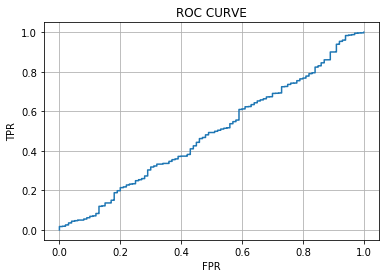

In [6]:
# Ploting roc curve

plt.plot(fpr_list,tpr_list)
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show

In [7]:
# COmputing Area under the curve
Auc = np.trapz(tpr_list, fpr_list)
print("AUC is =",Auc)

AUC is = 0.48829900000000004


## Task - 2

<font color='red'><b></b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b>
<br>
will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{number of false positive}$

In [9]:
# computing best thresold value

dictt = dict()
for actual_pred_y in tqdm(data.pred_y):
    y_tilda = []
    i = 0
    while i<len(data.pred_y):
        if data.pred_y.iloc[i] < actual_pred_y:
            y_tilda.append(0)
        else:
            y_tilda.append(1)
        i = i+1
    
    tp,tn,fn,fp = 0,0,0,0
    i = 0
    while i < len(data.actual_y):
        if (data.actual_y.iloc[i] == 1) and (y_tilda[i] == 0):
            fn = fn + 1
        if (data.actual_y.iloc[i] == 0) and (y_tilda[i] == 1):
            fp = fp + 1
        i = i+1
    # computing matrix A    
    A = (500*fn)+(100*fp)
    # Storing in dictionary
    dictt[actual_pred_y] = A
# here i take help from stackoverflow
dictt_updated = {k: v for k, v in sorted(dictt.items(), key=lambda item: item[1])}
best_thresold_value = min(dictt_updated.items(), key=lambda x: x[1])[0]
#printing Best thresold value
print("best_thresold_value is :" , best_thresold_value)

100%|██████████████████████████████████████████████████████████████████████████████| 2852/2852 [08:47<00:00,  5.41it/s]

best_thresold_value is : 0.2300390278970873


## Task - 2

<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [71]:
# Mean square error
i = 0
square_error_list = []
while i<len(data.actual_y):
    error = data.actual_y[i] - data.pred_y[i]
    squared_error = error**2
    square_error_list.append(squared_error)
    i = i+1
Mean_Square_Error = np.mean(square_error_list)
print("Mean Square Error is =",Mean_Square_Error)

Mean Square Error is = 177.16569974554707


In [72]:
# MAPE
sum_of_abs_error = 0
sum_of_actual_y_s = 0

i = 0
while i<len(data.actual_y):
    error = data.actual_y[i] - data.pred_y[i]
    abs_error = abs(error)
    sum_of_abs_error = sum_of_abs_error + abs_error
    sum_of_actual_y_s = sum_of_actual_y_s + data.actual_y[i]
    i = i+1
    
MAPE = sum_of_abs_error / sum_of_actual_y_s

print("MAPE IS =" , MAPE)

MAPE IS = 0.1291202994009687


In [73]:
# R^2 Error
SS_total = 0
SS_residue  = 0
y_i_bar = int(data["actual_y"].mean())

i = 0
while i<len(data.actual_y):
    
    sum_of_square = data.actual_y[i] - y_i_bar
    sum_of_square = sum_of_square**2
    SS_total = SS_total + sum_of_square
    
    error = data.actual_y[i] - data.pred_y[i]
    squared_error = error**2
    SS_residue = SS_residue + squared_error
    i = i+1
    
R_square = (SS_total - SS_residue) / SS_total
print("R_sqare is = " , R_square)

R_sqare is =  0.9563616749254799
